# Question 3:

part 2:

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
#define image1 here
image1 = np.array([[150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154],
                   [150,151,153,155,156,155,154]])  

# with cv2
image1 = np.array(image1, dtype=np.uint8)

In [13]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    # calculate histogram with opencv
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

Text(0.5, 1.0, 'histogram')

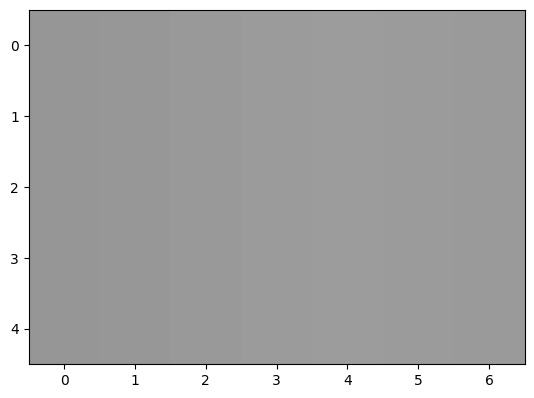

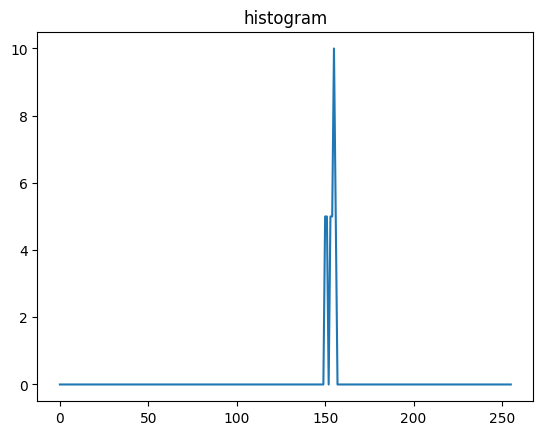

In [14]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [15]:
# Define a function to perform histogram stretching on an input image
def stretch_hist(image):
  # Make a copy of the input image to avoid modifying it
  output_image = image.copy()
  
  # Calculate the histogram of the input image
  hist = calc_hist(image)
  
  # Set the minimum and maximum pixel values to 0 and 255, respectively
  MIN, MAX = 0, 255
  
  # Find the minimum and maximum intensity values that appear in the input image
  f_min = 0
  f_max = 255
  for i in range(256):
    if hist[i] != 0:
      f_min = i
      break
  for i in range(255, -1, -1):
    if hist[i] != 0:
      f_max = i
      break
      
  # Calculate the transfer function that maps the input image to the output image
  # without using a for loop
  transfer_func = np.zeros(256)
  for i in range(256):
      transfer_func[i] = (i-f_min)/(f_max-f_min)*(MAX-MIN)+MIN
      
  # Apply the transfer function to every pixel in the input image to produce
  # the output image
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      output_image[i,j] = transfer_func[image[i,j]]
      
  # Return the stretched image
  return output_image


Text(0.5, 1.0, 'new histogram')

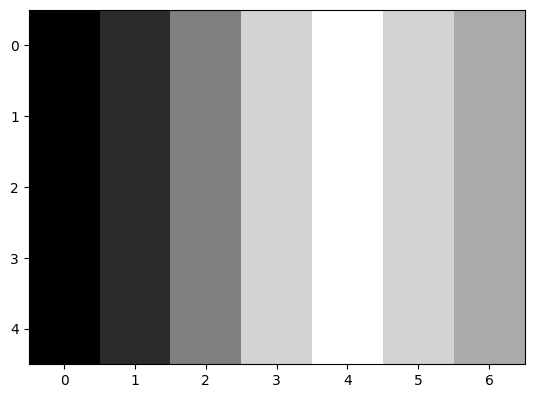

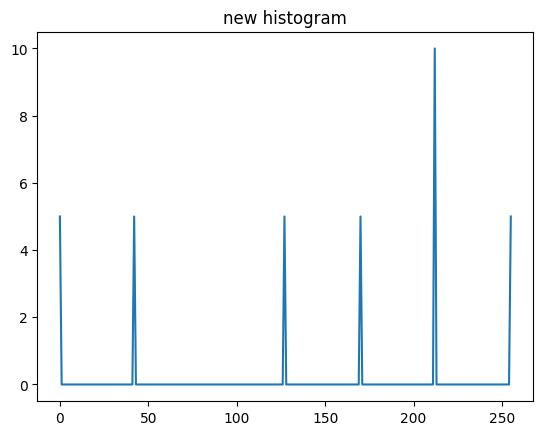

In [16]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


Text(0.5, 1.0, 'histogram')

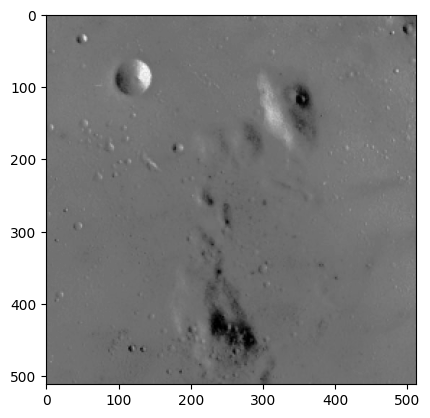

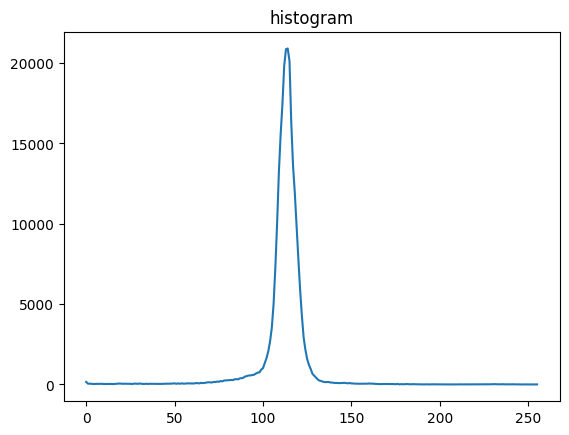

In [17]:
# first read the image and show it.(image2)
image2 = cv2.imread('Q3_image/image2.jpg',0)
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)
# show histogram of image2
plt.figure()
hist = calc_hist(image2)
plt.plot(hist)
plt.title('histogram')

In [18]:
# Define a function to perform modified histogram stretching on an input image
def modified_stretch_hist(image):
  # Make a copy of the input image to avoid modifying it
  output_image = image.copy()
  
  # Calculate the histogram of the input image
  hist = calc_hist(image)
  
  # Calculate the cumulative distribution function (cdf) of the input image
  cdf = np.zeros(256)
  cdf[0] = hist[0]
  for i in range(1, 256):
    cdf[i] = cdf[i-1] + hist[i]
  cdf = cdf/cdf[-1]
  
  # Apply the modified transfer function to every pixel in the input image to produce
  # the output image
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      output_image[i,j] = cdf[image[i,j]]*255
      
  # Return the stretched image
  return output_image


Text(0.5, 1.0, 'histogram')

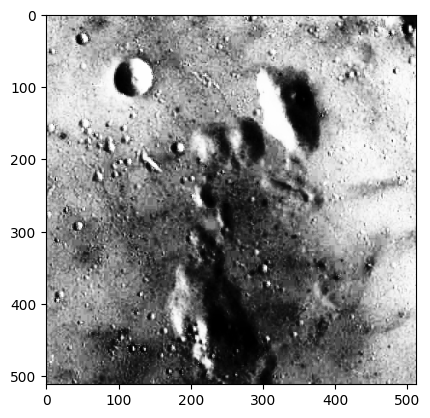

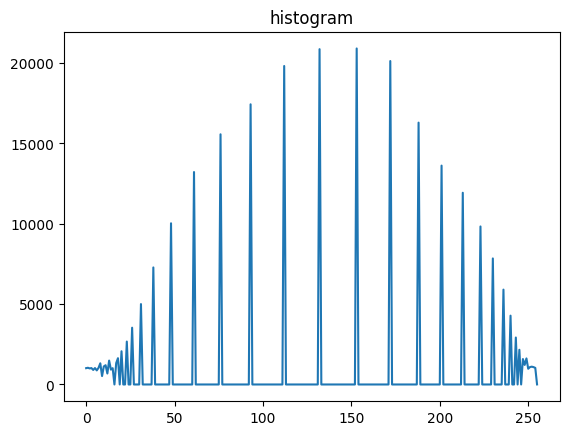

In [19]:
#try your new function and show the result
clip_hist_image = modified_stretch_hist(image2)
plt.imshow(clip_hist_image,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist_image))
plt.title('histogram')